# TP réseaux de neurones

Diane Lingrand (diane.lingrand@univ-cotedazur.fr)

Polytech SI4 - CVML - 2022-23

## imports nécessaires pour la suite

In [20]:
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn import ensemble
from sklearn.metrics import ConfusionMatrixDisplay, f1_score
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow.keras.utils
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping


In [21]:
# reading the dataset
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
print("shape of x_train:", x_train.shape)
print("shape of y_train:", y_train.shape)

shape of x_train: (60000, 28, 28)
shape of y_train: (60000,)


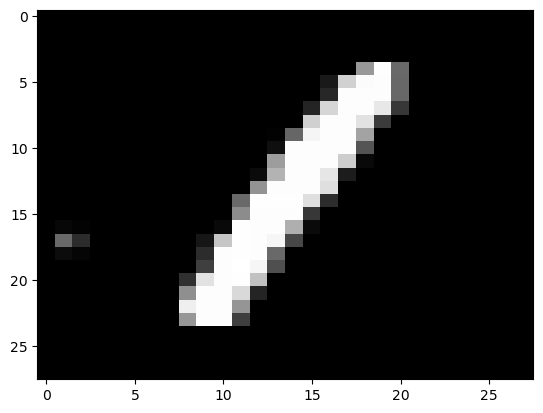

In [23]:
# display a random image from the train dataset (re-run the cell in order to change the image)
import matplotlib.pyplot as plt
i = random.randint(0,len(x_train)-1)
plt.imshow(x_train[i],aspect="auto",cmap='gray')
plt.show()

# 1. Un premier MLP

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Initialize the constructor
model = Sequential()

# Add an input layer which is equivalent to the size of MNIST dataset and flatten the 28x28 image to a 784 vector
model.add(Flatten(input_shape=(28, 28)))

# Add one hidden layer with 4 neurons and sigmoid activation
model.add(Dense(4, activation='sigmoid'))

# Add an output layer with softmax activation since it is a multi-class classification problem
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to check if everything is fine
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min', restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 4)                 3140      
                                                                 
 dense_9 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
469/469 [==============================] - 2s 2ms/step - loss: 1.8585 - accuracy: 0.5300 - val_loss: 1.5906 - val_accuracy: 0.6661
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 1.4332 - accuracy: 0.6937 - val_loss: 1.2731 - val_accuracy: 0.7202
Epoch 3/100
469/469 [=========

469/469 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.8570 - val_loss: 0.5138 - val_accuracy: 0.8475
Epoch 53/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4957 - accuracy: 0.8569 - val_loss: 0.5142 - val_accuracy: 0.8470
Epoch 54/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4950 - accuracy: 0.8568 - val_loss: 0.5132 - val_accuracy: 0.8486
Epoch 55/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4942 - accuracy: 0.8565 - val_loss: 0.5126 - val_accuracy: 0.8481
Epoch 56/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.8571 - val_loss: 0.5140 - val_accuracy: 0.8493
Epoch 57/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4932 - accuracy: 0.8576 - val_loss: 0.5158 - val_accuracy: 0.8472
Epoch 58/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4927 - accuracy: 0.8578 - val_loss: 0.5117 - val_accuracy: 0.8494
Epoch

Que vaut le score F1?

Weighted F1 score: 0.8484580450502708


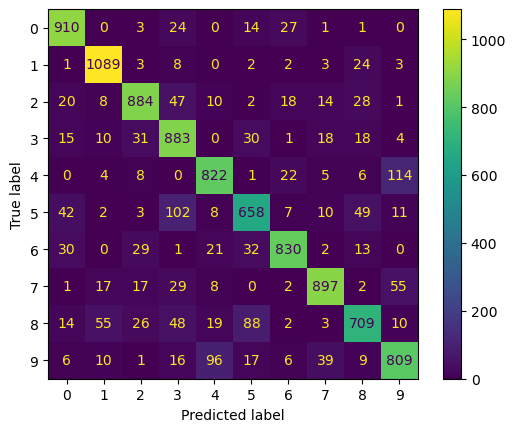

In [25]:
y_pred = model.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test from one-hot encoded vectors to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate the F1 score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print('Weighted F1 score:', f1)

# Display the color-coded confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes)

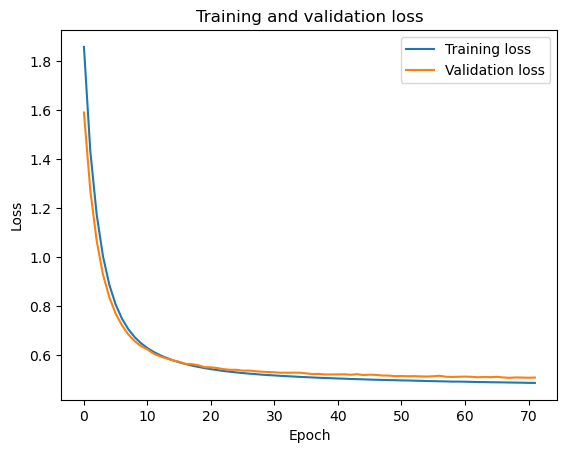

In [26]:
## Training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## One Hidden Layer - testing the number of neurons

In [31]:
def create_model(num_neurons):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(num_neurons, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_model(model, x_train, y_train, x_test, y_test):
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode='min', restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

# Define a function to plot the accuracies
def plot_accuracies(accuracies):
    accuracy_values = list(accuracies.values())
    neuron_labels = list(accuracies.keys())
    plt.boxplot(accuracy_values, labels=neuron_labels)
    plt.xlabel('Number of Neurons in the Hidden Layer')
    plt.ylabel('Accuracy')
    plt.title('ANN with only one hidden layer')
    plt.show()

Trial 1/5 for 2 neurons, Test accuracy: 0.5292999744415283
Trial 2/5 for 2 neurons, Test accuracy: 0.5152999758720398
Trial 3/5 for 2 neurons, Test accuracy: 0.4375999867916107
Trial 4/5 for 2 neurons, Test accuracy: 0.5267000198364258
Trial 5/5 for 2 neurons, Test accuracy: 0.47429999709129333
Trial 1/5 for 4 neurons, Test accuracy: 0.8418999910354614
Trial 2/5 for 4 neurons, Test accuracy: 0.8184999823570251
Trial 3/5 for 4 neurons, Test accuracy: 0.8420000076293945
Trial 4/5 for 4 neurons, Test accuracy: 0.8274000287055969
Trial 5/5 for 4 neurons, Test accuracy: 0.8338000178337097
Trial 1/5 for 6 neurons, Test accuracy: 0.8970999717712402
Trial 2/5 for 6 neurons, Test accuracy: 0.8902000188827515
Trial 3/5 for 6 neurons, Test accuracy: 0.894599974155426
Trial 4/5 for 6 neurons, Test accuracy: 0.892300009727478
Trial 5/5 for 6 neurons, Test accuracy: 0.8895000219345093
Trial 1/5 for 8 neurons, Test accuracy: 0.9211000204086304
Trial 2/5 for 8 neurons, Test accuracy: 0.917900025844574

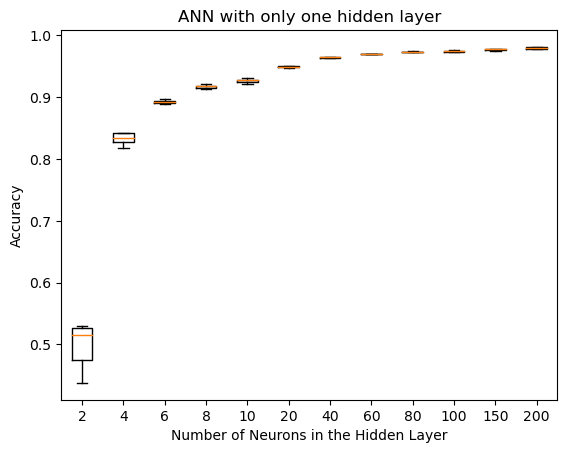

In [34]:

num_trials = 5 
neuron_numbers = [2, 4, 6, 8, 10, 20, 40, 60, 80, 100, 150, 200]


accuracies = {neurons: [] for neurons in neuron_numbers}


for neurons in neuron_numbers:
    trial_accuracies = []
    for trial in range(num_trials):
        model = create_model(neurons)
        loss, accuracy = train_model(model, x_train, y_train, x_test, y_test)
        trial_accuracies.append(accuracy)
        print(f'Trial {trial+1}/{num_trials} for {neurons} neurons, Test accuracy: {accuracy}')
    accuracies[neurons] = trial_accuracies


plot_accuracies(accuracies)

## Testing number of hidden layers

Trial 1/5, Fixed Neurons: 20, Hidden Layers: 1, Test loss: 0.1633559614419937, Test accuracy: 0.9535999894142151
Trial 2/5, Fixed Neurons: 20, Hidden Layers: 1, Test loss: 0.1750641167163849, Test accuracy: 0.9492999911308289
Trial 3/5, Fixed Neurons: 20, Hidden Layers: 1, Test loss: 0.1633298248052597, Test accuracy: 0.9524000287055969
Trial 4/5, Fixed Neurons: 20, Hidden Layers: 1, Test loss: 0.16372400522232056, Test accuracy: 0.9520000219345093
Trial 5/5, Fixed Neurons: 20, Hidden Layers: 1, Test loss: 0.16030031442642212, Test accuracy: 0.9523000121116638
Trial 1/5, Fixed Neurons: 20, Hidden Layers: 2, Test loss: 0.16494126617908478, Test accuracy: 0.9523000121116638
Trial 2/5, Fixed Neurons: 20, Hidden Layers: 2, Test loss: 0.14829286932945251, Test accuracy: 0.9563999772071838
Trial 3/5, Fixed Neurons: 20, Hidden Layers: 2, Test loss: 0.15690813958644867, Test accuracy: 0.954200029373169
Trial 4/5, Fixed Neurons: 20, Hidden Layers: 2, Test loss: 0.157231867313385, Test accuracy:

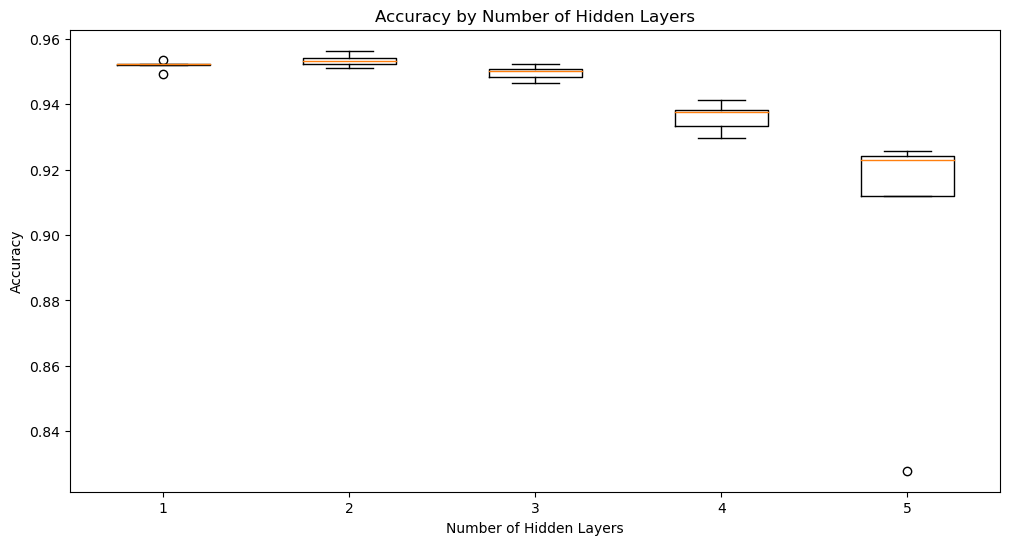

In [39]:
def add_hidden_layers(model, num_neurons, num_hidden_layers):
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='sigmoid'))
    return model

def create_and_train_multiple_hidden_layers(num_trials, fixed_neurons, num_hidden_layers, x_train, y_train, x_test, y_test):
    accuracies_per_layer_count = {layers: [] for layers in num_hidden_layers}
    
    for num_layers in num_hidden_layers:
        trial_accuracies = []
        for trial in range(num_trials):
            model = Sequential()
            model.add(Flatten(input_shape=(28, 28)))
            model = add_hidden_layers(model, fixed_neurons, num_layers)
            model.add(Dense(10, activation='softmax'))
            model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
            
            loss, accuracy = train_model(model, x_train, y_train, x_test, y_test)
            trial_accuracies.append(accuracy)
            print(f'Trial {trial+1}/{num_trials}, Fixed Neurons: {fixed_neurons}, Hidden Layers: {num_layers}, Test loss: {loss}, Test accuracy: {accuracy}')
        
        accuracies_per_layer_count[num_layers] = trial_accuracies
    
    return accuracies_per_layer_count

# Now call this function
num_trials = 5
neuron_numbers = 20
num_layers = [1, 2, 3, 4, 5]  # Example layer sizes

all_accuracies = create_and_train_multiple_hidden_layers(num_trials, neuron_numbers, num_layers, x_train, y_train, x_test, y_test)

# Then plot all accuracies
plot_accuracies(all_accuracies)


# 2. Convergence

## A t-on laissé le temps à l'algorithme de converger?
Modifiez le nombre d'itérations. Les résultats sont-ils meilleurs?

## Critère d'arrêt autre que le nombre d'itérations

In this small example, we decided, as a default behavior, to stop after 20 epochs. Of course this value can be changed. Another way to deal with that is to use early stopping criterion. All options are described in the keras documentation. Feel free to experiment all options!

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

# we define a callback function that will control if the accuracy 
# on the validation set (a part of train set) is not changing more than 10-4 with a patience of 20 iterations
# If the last accuracy value is not the best one, we still keep the last results
# In this example, we extracted 20% of the train set for the validation set that will be used to monitor the convergence.

ourCallback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

# let's learn the network again !
# We do not know when the training will stop but no more than 2000 epochs.
model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[ourCallback])


Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.8348 - val_loss: 0.5301 - val_accuracy: 0.8439
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5589 - accuracy: 0.8356 - val_loss: 0.5291 - val_accuracy: 0.8452
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.8365 - val_loss: 0.5277 - val_accuracy: 0.8443
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5562 - accuracy: 0.8365 - val_loss: 0.5265 - val_accuracy: 0.8453
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5548 - accuracy: 0.8369 - val_loss: 0.5255 - val_accuracy: 0.8451
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5535 - accuracy: 0.8372 - val_loss: 0.5242 - val_accuracy: 0.8457
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.8372 - val_loss: 0.5230 - val_accuracy: 0.8457

Epoch 58/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5076 - accuracy: 0.8515 - val_loss: 0.4842 - val_accuracy: 0.8572
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5071 - accuracy: 0.8521 - val_loss: 0.4840 - val_accuracy: 0.8570
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5066 - accuracy: 0.8519 - val_loss: 0.4834 - val_accuracy: 0.8570
Epoch 61/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5060 - accuracy: 0.8523 - val_loss: 0.4833 - val_accuracy: 0.8564
Epoch 62/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5055 - accuracy: 0.8519 - val_loss: 0.4825 - val_accuracy: 0.8575
Epoch 63/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5049 - accuracy: 0.8526 - val_loss: 0.4823 - val_accuracy: 0.8576
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5043 - accuracy: 0.8525 - val_loss: 0.4813 - val_accuracy:

A quel 'epoch' l'algorithme s'est-il arrêté ?

## Evolution de la convergence

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.callbacks import EarlyStopping

ourCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=False)

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
from pandas import DataFrame
history = model.fit(xTrain, yTrain, epochs=2000, batch_size=128, validation_split=0.2, callbacks=[ourCallback])
pandas.DataFrame(history.history).plot()

NameError: name 'model' is not defined

# 3. Changements de topologie


**Est-ce qu'augmenter le nombre de neurones par couche augmente les performances?**

Augmenter le nombre de neurones peut potentiellement améliorer les performances en capturant plus de nuances dans les données, mais cela peut aussi mener à l'overfitting si le réseau devient trop complexe par rapport à la simplicité des données.

**Est-ce qu'augmenter le nombre de couches de neurones augmente les performances?**

Ajouter des couches de neurones peut augmenter la capacité du modèle à apprendre des hiérarchies de caractéristiques plus complexes, ce qui pourrait améliorer la performance sur des tâches difficiles.

**Si vous observez qu'en augmentant le nombre de couches cachées, les performances chutent, essayez de remplacer l'activiation 'sigmoid' par 'relu'. Est-ce mieux ?**

Si les performances diminuent avec plus de couches cachées utilisant 'sigmoid', passer à 'relu' peut aider, car 'relu' souffre moins du problème de disparition de gradient et peut faciliter la convergence lors de l'apprentissage.